<a href="https://colab.research.google.com/github/ayyash-ayyub/machine-learning/blob/main/AnalisisSentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! install tweepy


install: missing destination file operand after 'tweepy'
Try 'install --help' for more information.


In [5]:
!pip install textblob

In [7]:
import tweepy # to gather tweeter data
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [8]:
# Twitter Api  Credentials
APIkey= "qBbo2B5vQxnDBtwqNTZ3C57UA"
APISecreatKey= "tbveShl1CGJPM706ybeIPIWGNZWBaXtsyAi8wZ6VgmiWR9AOGB"
accessToken= "1080866487819272192-VhW4s2WGskT3tg65eVeC6BdgRxMHpN"
accessTokenSecreat= "8EPbYCHl3aXculBl4SxfpCIsCsfEJxyoMIrZv6icU0oUJ"

In [16]:
# create the authentication object
authenticate = tweepy.OAuthHandler(APIkey,APISecreatKey)
authenticate.set_access_token(accessToken,accessTokenSecreat)
api= tweepy.API(authenticate)

In [35]:
posts= api.user_timeline(screen_name='Israel',count=100,lang="en",tweet_mode='extended')
i=1
for tweet in posts[:49]:  # just want to see the top 10 from 100
    print(str(i) + ') ' + tweet.full_text + '\n')
    i= i+1

1) Thank you so much to all of the countries who continue to support our 🇮🇱 right to protect our citizens from terror.                                                         🇨🇴🇬🇹🇭🇳🇵🇾🇺🇾🇺🇸🇧🇷🇦🇱🇦🇺🇦🇹🇧🇦🇧🇬🇨🇦🇨🇾🇨🇿🇬🇪🇩🇪🇭🇺🇮🇹🇱🇹🇲🇩🇳🇱🇲🇰🇸🇮🇺🇦

2) @cowmehdi can anyone sleep with hundreds of rockets flying over their head?

3) These aren’t fireworks over Ashdod. 

They’re rockets.                               https://t.co/Bcclhn33Qq

4) ⚠️⚠️Happening right now: rocket alarms sounding all over Israel 

THIS IS NOT NORMAL. 

#IsraelUnderAttack https://t.co/8AbypeTLqE

5) Shabbat is traditionally a day of rest, but for millions of Israelis there's no rest under rocket fire. 

This family had to run for rocket fire in middle of their Shabbat meal. 

RT this so people REALLY know what's going on in Israel. 

#IsraelUnderAttack https://t.co/DC6weFCb8f

6) RT @missmayim: https://t.co/FKD6A3cYR2

7) The Shabbat has been far from quiet, with hundreds of rockets fired from #Gaza, sending millions of Israelis to b

In [36]:
# Create a dataframe with a column called tweets
df= pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,Thank you so much to all of the countries who ...
1,@cowmehdi can anyone sleep with hundreds of ro...
2,These aren’t fireworks over Ashdod. \n\nThey’r...
3,⚠️⚠️Happening right now: rocket alarms soundin...
4,"Shabbat is traditionally a day of rest, but fo..."
...,...
95,RT @ImpactIsrael: Israel's #Equal Rights Commi...
96,We stand together with our good friends in Ind...
97,@packsaddleman Thank you ♥️
98,We're reading all of these comments &amp; send...


In [37]:
# make a function to clean tweets
def cleanTxt(text):
    text= re.sub('@[A-Za-z0-9]+','',text ) #removing mentions
    text= re.sub("#",'',text) #removing #
    text= re.sub('RT[\s]+','',text) # removing Retweets
    text= re.sub('https?:\/\/\S+','',text) #removing links
    return text

In [38]:

df['Tweets']= df['Tweets'].apply(cleanTxt)

In [39]:
df

,Tweets
0,Thank you so much to all of the countries who ...
1,can anyone sleep with hundreds of rockets fly...
2,These aren’t fireworks over Ashdod. \n\nThey’r...
3,⚠️⚠️Happening right now: rocket alarms soundin...
4,"Shabbat is traditionally a day of rest, but fo..."
...,...
95,: Israel's Equal Rights Commission for Persons...
96,We stand together with our good friends in Ind...
97,Thank you ♥️
98,We're reading all of these comments &amp; send...


In [50]:
analysis=TextBlob("Israel terrorist")

In [52]:
analysis.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [53]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the Polarity of all the tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

In [54]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Thank you so much to all of the countries who ...,0.367857,0.242857,Positive
1,can anyone sleep with hundreds of rockets fly...,0.000000,0.000000,Neutral
2,These aren’t fireworks over Ashdod. \n\nThey’r...,0.000000,0.000000,Neutral
3,⚠️⚠️Happening right now: rocket alarms soundin...,0.592857,0.105357,Positive
4,"Shabbat is traditionally a day of rest, but fo...",0.316667,0.066667,Positive
...,...,...,...,...
95,: Israel's Equal Rights Commission for Persons...,0.125000,0.000000,Neutral
96,We stand together with our good friends in Ind...,0.600000,0.575000,Positive
97,Thank you ♥️,0.000000,0.000000,Neutral
98,We're reading all of these comments &amp; send...,0.675000,0.566667,Positive


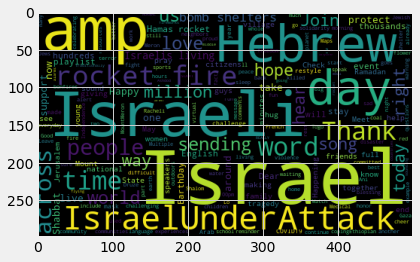

In [55]:
# Word Cloud Visualization
allwords= ' '.join([i for i in df['Tweets']])
Cloud= WordCloud(width=500,height=300,random_state=0,max_font_size=100).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [47]:
# Create a function to compute negative neutral and positive

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Thank you so much to all of the countries who ...,0.367857,0.242857,Positive
1,can anyone sleep with hundreds of rockets fly...,0.000000,0.000000,Neutral
2,These aren’t fireworks over Ashdod. \n\nThey’r...,0.000000,0.000000,Neutral
3,⚠️⚠️Happening right now: rocket alarms soundin...,0.592857,0.105357,Positive
4,"Shabbat is traditionally a day of rest, but fo...",0.316667,0.066667,Positive
...,...,...,...,...
95,: Israel's Equal Rights Commission for Persons...,0.125000,0.000000,Neutral
96,We stand together with our good friends in Ind...,0.600000,0.575000,Positive
97,Thank you ♥️,0.000000,0.000000,Neutral
98,We're reading all of these comments &amp; send...,0.675000,0.566667,Positive


In [56]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
1,can anyone sleep with hundreds of rockets fly...,0.000,0.0,Neutral
2,These aren’t fireworks over Ashdod. \n\nThey’r...,0.000,0.0,Neutral
5,:,0.000,0.0,Neutral
9,__ Thank you!,0.000,0.0,Neutral
10,": Taking part in a event on the channel, to ...",0.400,0.0,Neutral
12,_Today Thank you ❤️,0.000,0.0,Neutral
13,❤️,0.000,0.0,Neutral
18,"An honor to host over 1,600 people on our , to...",0.000,0.0,Neutral
20,It will be in English.,0.000,0.0,Neutral
21,In ten minutes (20:00pm Israel time) we’ll be ...,0.000,0.0,Neutral


In [57]:
df['Analysis'].value_counts()

Positive    49
Neutral     40
Negative    11
Name: Analysis, dtype: int64

In [58]:
df.shape

(100, 4)

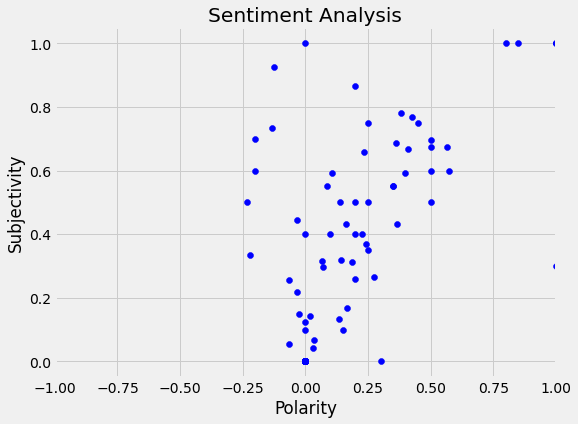

In [59]:
# plotting scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

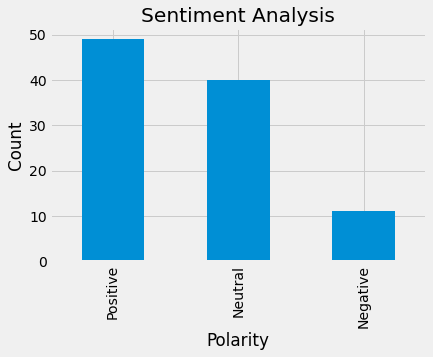

In [60]:

df['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()